# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `tf.keras.datasets`. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [1]:
import numpy as np

import sys

import tensorflow.keras
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")
#!nvidia-smi

Tensor Flow Version: 2.10.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# PARTICION EXTERNA
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist      # hace el unpacking directamente
print('\nPARTICION EXTERNA')
print('TRAIN DATA: ')
print(X_train_full.shape)
print(y_train_full.shape)
print('TEST DATA')
print(X_test.shape)
print(y_test.shape)
print('\n')

# PARTICION INTERNA
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
print('PARTICION INTERNA')
print('TRAIN DATA')
print(X_train.shape)
print(y_train.shape)
print('VALIDATION DATA')
print(X_valid.shape)
print(y_valid.shape)



PARTICION EXTERNA
TRAIN DATA: 
(60000, 28, 28)
(60000,)
TEST DATA
(10000, 28, 28)
(10000,)


PARTICION INTERNA
TRAIN DATA
(55000, 28, 28)
(55000,)
VALIDATION DATA
(5000, 28, 28)
(5000,)


### Exploring the data

#### image data

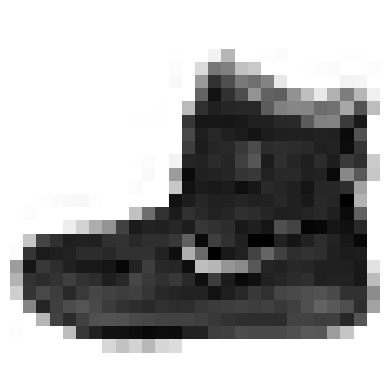

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

#### labels data

The labels are the class IDs (represented as uint8), from 0 to 9:

In [4]:
print(y_train)
print(type(y_train))
print(y_train.dtype)

[9 0 0 ... 9 0 2]
<class 'numpy.ndarray'>
uint8


In [5]:
# Here are the corresponding class names:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

#### Image and labels

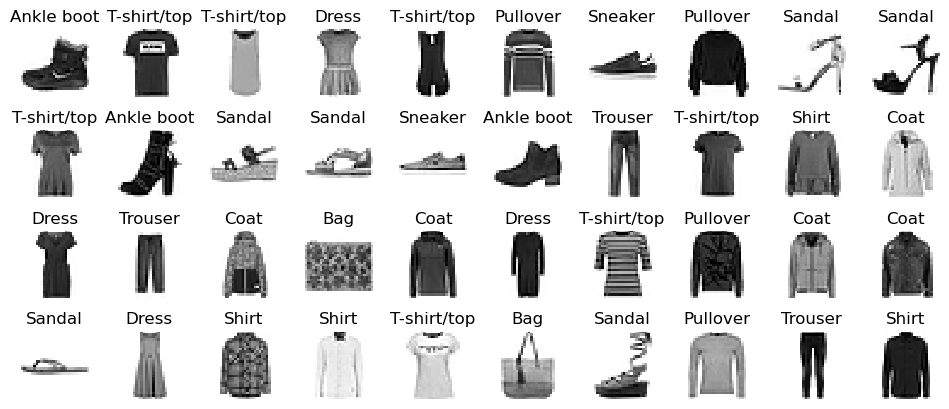

In [6]:
n_rows = 4
n_cols = 10

plt.figure(figsize= (n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap= 'binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])

plt.subplots_adjust(wspace= 0.2, hspace= 0.5)
plt.show()

### Data preprocessing

In [7]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

### Creating the model using sequential API

#### la manera tradicional capa por capa

In [8]:
# creamos el modelo de manera tradicional
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


tf.random.set_seed(42)                      # fijamos la semilla para hacer el codigo reproducible
model = Sequential()                        # creamos el modelo sequencial
model.add(tf.keras.Input(shape= [28, 28]))            # la primera capa se le especifica el input shape
model.add(Flatten())                        # como es un mlp es necesario convertir el imput a 1D
model.add(Dense(300, activation= 'relu'))   # 300 neuronas en la 1ra capa oculta
model.add(Dense(100, activation= 'relu'))   # 100 neuronas en ambas la f de activación es relu
model.add(Dense(10, activation= 'softmax')) # neurona por cada clase a predecir, activacion softmax

#### mediante una lista de capas

A veces es más conveniente usar una lista de capas.

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential([Flatten(input_shape=[28, 28]),      # input layer
                    Dense(300, activation= 'relu'),     # hidden 1
                    Dense(100, activation= 'relu'),     # hidden 2
                    Dense(10, activation= 'softmax')])  # output

print(model.summary())

# los parametros de cada capa son: 
# neuronas_capa_actual*neuronas_capa_anterior(o input de la capa actual) + neuronas_capa_actual(biases)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
print(hidden1.name)

print(model.get_layer('dense') is hidden1)

dense
True


In [13]:
weights, biases = hidden1.get_weights()
print(weights.shape, biases.shape, '\n')
print(weights[:10])       # los 10 priimeros pesos de la primera capa
print(biases[:10])        # los 10 primeros biases de la primera capa

(784, 300) (300,) 

[[-6.8252444e-02 -1.9189663e-02  1.5357785e-02 ... -9.6991658e-05
   2.4011552e-02 -5.0973624e-02]
 [ 5.2274242e-02 -1.6339153e-02 -1.4906876e-02 ...  6.3949019e-02
  -5.6442469e-02  4.6011284e-02]
 [ 2.7836956e-02 -4.3413378e-02 -2.9732972e-02 ... -4.1640323e-02
   4.9376175e-02  6.9011748e-02]
 ...
 [-7.3596925e-02  4.2473234e-02  4.1305430e-02 ...  2.8017044e-02
   5.9073612e-02  4.6435930e-02]
 [ 2.4703883e-02 -4.1835792e-02 -3.8512979e-02 ... -5.5075593e-02
  -3.0556291e-02  6.7632854e-02]
 [ 1.1623703e-02  1.9676782e-02 -6.0522251e-02 ...  4.6140589e-02
   2.4600685e-02  4.8302107e-02]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Compiling the model

Se le tiene que especificar al menos:
1. la funciónn de pérdida
2. El optimizador
3. La metrica que queremos que analize

In [14]:
model.compile(loss= 'sparse_categorical_crossentropy',      # las labels no estan en one hot
              optimizer= 'sgd',                             # stochatic gradient descent
              metrics= ['accuracy'])                        # accuracy como metrica ---> 'sparse_categorical_accuracy'

# # extra code – this cell is equivalent to the previous cell
# model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=[tf.keras.metrics.sparse_categorical_accuracy])

### Training the model

In [15]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_valid, y_valid), 
                    epochs= 40)

Epoch 1/40
1719/1719 [==============================] - 11s 5ms/step - loss: 0.7266 - accuracy: 0.7581 - val_loss: 0.5044 - val_accuracy: 0.8284
Epoch 2/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4915 - accuracy: 0.8291 - val_loss: 0.4706 - val_accuracy: 0.8292
Epoch 3/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4452 - accuracy: 0.8431 - val_loss: 0.4351 - val_accuracy: 0.8452
Epoch 4/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4211 - accuracy: 0.8525 - val_loss: 0.4016 - val_accuracy: 0.8588
Epoch 5/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3999 - accuracy: 0.8601 - val_loss: 0.3951 - val_accuracy: 0.8586
Epoch 6/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3835 - accuracy: 0.8655 - val_loss: 0.4029 - val_accuracy: 0.8598
Epoch 7/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3708 - accuracy: 0.8687 - val_loss: 0.3750 - val_accuracy

In [16]:
print(history.params)
print(history.epoch)

{'verbose': 1, 'epochs': 40, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


### Learning curves

In [17]:
type(history.history)

dict

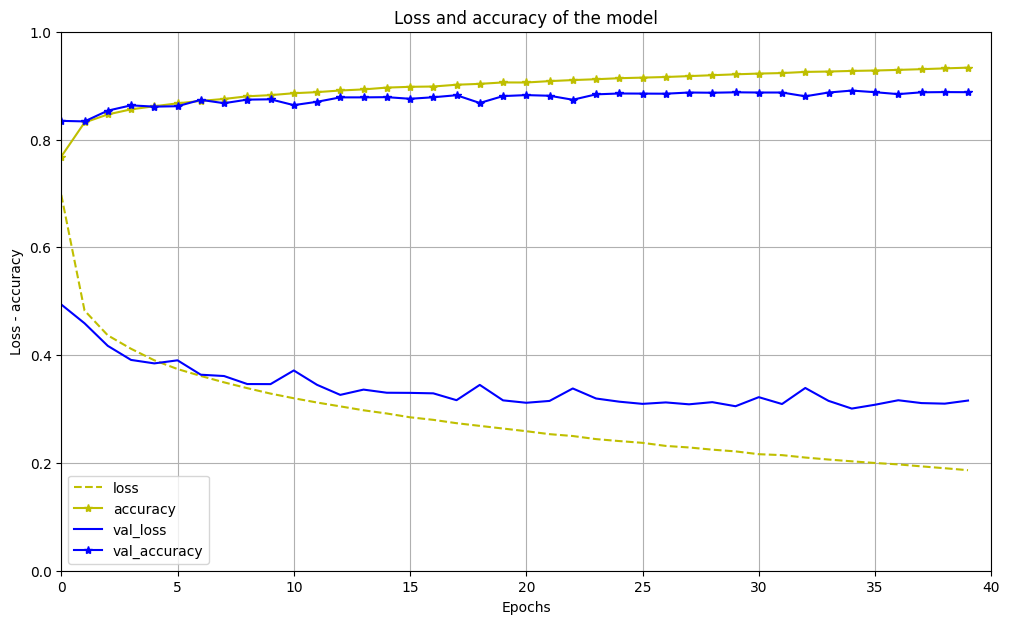

In [18]:
import pandas as pd

# plt.style.use('ggplot')
pd.DataFrame(history.history).plot(figsize=(12, 7), 
                                   xlim= [0, 40], ylim= [0, 1], 
                                   grid= True, 
                                   xlabel= 'Epochs', ylabel= 'Loss - accuracy', 
                                   style= ['y--', 'y-*', 'b-', 'b-*'])
plt.legend(loc= 'best')
plt.title('Loss and accuracy of the model')
plt.show()

### Evaluate the model

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3342 - accuracy: 0.8862


[0.3342167139053345, 0.8862000107765198]

### Using the model to make predictions

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print('\n')

print(y_proba.round(2))
print('\n')

y_pred = y_proba.argmax(axis= 1)
print(y_pred)
print(np.array(class_names)[y_pred])

1/1 [==============================] - 0s 34ms/step


[[0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.99]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


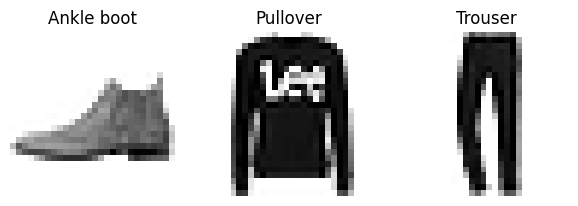

In [24]:
plt.figure(figsize=(7.2, 2.4))

for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)                                # una gráfica de una linea 3 columnas: row, col, index
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## MLP with Keras for REGRESSION TASK


In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

### Load the data

In [27]:

housing = fetch_california_housing()
print('PARTICION EXTERNA')
X_train_full, X_test, y_train_full, y_test = train_test_split(
                                        housing.data, housing.target,
                                        random_state=42, 
                                        test_size=0.25)
print('TRAIN DATA: ')
print(X_train_full.shape)
print(y_train_full.shape)
print('TEST DATA')
print(X_test.shape)
print(y_test.shape)
print('\n')
print('PARTICION INTERNA')

X_train, X_valid, y_train, y_valid = train_test_split(
                                X_train_full, y_train_full, 
                                random_state=42, 
                                test_size=0.25)
# PARTICION INTERNA
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
print('TRAIN DATA')
print(X_train.shape)
print(y_train.shape)
print('VALIDATION DATA')
print(X_valid.shape)
print(y_valid.shape)

PARTICION EXTERNA
TRAIN DATA: 
(15480, 8)
(15480,)
TEST DATA
(5160, 8)
(5160,)


PARTICION INTERNA
TRAIN DATA
(10480, 8)
(10480,)
VALIDATION DATA
(5000, 8)
(5000,)


### Create, compile and train the model

In [34]:
from sklearn.metrics import r2_score

In [37]:
# create
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape= X_train.shape[1:])   # se necesita fuera para usar el metodo adapt
model = tf.keras.models.Sequential([norm_layer, 
                                    Dense(20, activation= 'relu'), 
                                    Dense(20, activation= 'relu'), 
                                    Dense(20, activation= 'relu'), 
                                    Dense(1)])

# compile
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer= optimizer, 
              loss= 'mse', 
              metrics=['RootMeanSquaredError'])

# train
norm_layer.adapt(X_train)
H = model.fit(X_train, y_train, 
              validation_data= (X_valid, y_valid), 
              epochs= 20)

Epoch 1/20
328/328 [==============================] - 2s 6ms/step - loss: 1.2874 - root_mean_squared_error: 1.1346 - val_loss: 0.6426 - val_root_mean_squared_error: 0.8016
Epoch 2/20
328/328 [==============================] - 2s 5ms/step - loss: 0.5241 - root_mean_squared_error: 0.7239 - val_loss: 0.4505 - val_root_mean_squared_error: 0.6712
Epoch 3/20
328/328 [==============================] - 1s 5ms/step - loss: 0.4098 - root_mean_squared_error: 0.6402 - val_loss: 0.4129 - val_root_mean_squared_error: 0.6426
Epoch 4/20
328/328 [==============================] - 2s 5ms/step - loss: 0.3815 - root_mean_squared_error: 0.6177 - val_loss: 0.3951 - val_root_mean_squared_error: 0.6286
Epoch 5/20
328/328 [==============================] - 2s 5ms/step - loss: 0.3674 - root_mean_squared_error: 0.6061 - val_loss: 0.3817 - val_root_mean_squared_error: 0.6178
Epoch 6/20
328/328 [==============================] - 2s 5ms/step - loss: 0.3537 - root_mean_squared_error: 0.5947 - val_loss: 0.3823 - val_

### learning_curves

In [16]:
pd.DataFrame(H.history).plot(figsize=(12, 7), 
                                   xlim= [0, 19], ylim= [0, 1], 
                                   grid= True, 
                                   xlabel= 'Epochs', ylabel= 'rmse mse', 
                                   style= ['y--', 'y-*', 'b-', 'b-*'])
plt.legend(loc= 'best')
plt.title('Loss mse AND rmse')
plt.show()

NameError: name 'pd' is not defined